# Tarefa 1 - Análise de Dados

Sua tarefa é encontrar um conjunto de dados de interesse para você, que contenha uma mistura de variáveis categóricas e numéricas. Como orientação, o conjunto de dados deve ter um mínimo de duas variáveis categóricas e três variáveis numéricas (esses critérios mínimos são orientações e não limites rígidos).
Se desejar, você pode utilizar os seguintes sites para encontrar o conjunto de dados:
• Repositório de dados do governo irlandês: https://data.gov.ie/
• Pesquisa de conjunto de dados do Google: https://datasetsearch.research.google.com/
Você deve então usar os métodos abordados neste curso para concluir uma análise e escrever um relatório sobre os dados usando o Python Notebook. A análise dos dados deve envolver o uso de tabelas, resumos numéricos e resumos gráficos dos dados.
Esta parte da sua atribuição será avaliada em termos de:
• Uso de funções apropriadas em Python. [15 pontos]
• Comentando claramente o código no arquivo .ipynb. [5 pontos]
• Produção de resultados claros para o conjunto de dados escolhido, usando medidas estatísticas apropriadas e gráficos apropriados. [15 pontos]
• A qualidade dos gráficos incluídos. [5 pontos]
• Resumir as conclusões da análise de forma apropriada. [30 pontos]


### Library Import

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt


# Preparação dos dados

### Dataset Reading

In [3]:
df1 = pd.read_csv('Plant_1_Generation_Data.csv')
df2 = pd.read_csv('Plant_2_Generation_Data.csv')

In [4]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOT

In [5]:
# Convertendo a coluna 'DATE_TIME' para o tipo datetime
df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'])
df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'])

### Concatenando os dois Conjuntos de Dados

In [6]:
# axis=0 para concatenar ao longo das linhas (empilhar verticalmente)
# ignore_index=True para redefinir os índices do DataFrame resultante
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [7]:
df.shape

(136476, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 7.3+ MB


In [9]:
df.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,136476,1.364760e+05,136476.000000,136476.000000,136476.000000,1.364760e+05
mean,2020-06-01 09:23:03.157478144,4.135497e+06,1708.541497,274.803511,3295.433783,3.303821e+08
min,2020-05-15 00:00:00,4.135001e+06,0.000000,0.000000,0.000000,0.000000e+00
25%,2020-05-23 23:00:00,4.135001e+06,0.000000,0.000000,28.321429,6.520020e+06
50%,2020-06-01 18:45:00,4.135001e+06,6.050000,3.506905,2834.803572,7.269333e+06
75%,2020-06-09 21:45:00,4.136001e+06,1155.788333,532.673333,5992.000000,2.826096e+08
max,2020-06-17 23:45:00,4.136001e+06,14471.125000,1410.950000,9873.000000,2.247916e+09
std,NaN,4.999862e+02,3222.181273,380.182569,3035.294425,6.085705e+08


### Verificando dados Nulos

In [10]:
df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

### Adequação de variável

### Separação da variavel DATA_TIME em duas variaveis

In [11]:
# Separando a coluna 'DATE_TIME' em duas colunas diferentes
df['DATE'] = df['DATE_TIME'].dt.date
df['TIME'] = df['DATE_TIME'].dt.time

# Exibindo o DataFrame resultante
print(df1)

                DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
68773 2020-06-17 23:45:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774 2020-06-17 23:45:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775 2020-06-17 23:45:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776 2020-06-17 23:45:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777 2020-06-17 23:45:00   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000 

### Apagando coluna DATE_TIME

In [12]:
df = df.drop(columns=['DATE_TIME'])

### Mudança de nome de variavel

In [13]:
df = df.rename(columns={'SOURCE_KEY':'INVERTER'})

### Function imprimir_valores_unicos()
A function that prints the unique values of each variable.

In [14]:
def imprimir_valores_unicos(data_f):
    for coluna in data_f.columns:
        valores_unicos = data_f[coluna].unique()
        print(f"  {coluna} = {valores_unicos}")

imprimir_valores_unicos(df)

  PLANT_ID = [4135001 4136001]
  INVERTER = ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE' '4UPUqMRk7TRMgml' '81aHJ1q11NBPMrL'
 '9kRcWv60rDACzjR' 'Et9kgGMDl729KT4' 'IQ2d7wF4YD8zU1Q' 'LYwnQax7tkwH5Cb'
 'LlT2YUhhzqhg5Sw' 'Mx2yZCDsyf6DPfv' 'NgDl19wMapZy17u' 'PeE6FRyGXUgsRhN'
 'Qf4GUc1pJu5T6c6' 'Quc1TzYxW2pYoWX' 'V94E5Ben1TlhnDV' 'WcxssY2VbP4hApt'
 'mqwcsP2rE7J0TFp' 'oZ35aAeoifZaQzV' 'oZZkBaNadn6DNKz' 'q49J1IKaHRwDQnt'
 'rrq4fwE8jgrTyWY' 'vOuJvMaM2sgwLmb' 'xMbIugepa2P7lBB' 'xoJJ8DcxJEcupym']
  DC_POWER = [ 0.         37.14285714 53.5        ...  3.78        3.58
  3.90714286]
  AC_POWER = [0.         3.58571429 5.1625     ... 3.63333333 3.45

In [15]:
df

,PLANT_ID,INVERTER,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00
...,...,...,...,...,...,...,...,...
136471,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,2020-06-17,23:45:00
136472,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,2020-06-17,23:45:00
136473,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,2020-06-17,23:45:00
136474,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,2020-06-17,23:45:00


### Duplicate Data

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: " , duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


# Task 1 - Analise dos dados

### Mean, Median, Mode, desvio padrão, Intervalo Interquartil
encontrando os valores estatisticos de cada variaveis numéricas

In [17]:
# Lista de colunas para calculo de valores estatisticos
columns_df= ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

In [18]:
# Função para calcular a média das variaveis e imprimi-las
def calculate_means(df, columns):
    for column in columns:
        mean = df[column].mean()
        print(f"Mean of {column}: {mean}")

# Função para calcular a mediana das variaveis e imprimi-las
def calculate_median(df, columns):
    for column in columns:
        median = df[column].median()
        print(f"Median of {column}: {median}")

# Função para calcular a moda das variaveis e imprimi-las
def calculate_mode(df, columns):
    for column in columns:
        mode = df[column].mode()
        print(f"Mode of {column}: {mode}")

# Função para Calcular o desvio padrão das variáveis e imprimí-las
def calculate_stdd(df, columns):
    for column in columns:
        stdd = df[column].std()
        print(f"Std Deviation of {column}: {stdd}")

def calculate_IQR(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        print(f"Intervalo Interquartil (IQR) of {column}: {IQR}")


In [19]:
calculate_means(df, columns_df)

Mean of DC_POWER: 1708.541496702347
Mean of AC_POWER: 274.80351054960653
Mean of DAILY_YIELD: 3295.433783295412
Mean of TOTAL_YIELD: 330382090.0684921


In [20]:
calculate_median(df, columns_df)

Median of DC_POWER: 6.05
Median of AC_POWER: 3.506904761904762
Median of DAILY_YIELD: 2834.8035715
Median of TOTAL_YIELD: 7269333.0


In [21]:
calculate_mode(df, columns_df)

Mode of DC_POWER: 0    0.0
Name: DC_POWER, dtype: float64
Mode of AC_POWER: 0    0.0
Name: AC_POWER, dtype: float64
Mode of DAILY_YIELD: 0    0.0
Name: DAILY_YIELD, dtype: float64
Mode of TOTAL_YIELD: 0    0.0
Name: TOTAL_YIELD, dtype: float64


In [22]:
calculate_stdd(df, columns_df)

Std Deviation of DC_POWER: 3222.1812733562097
Std Deviation of AC_POWER: 380.18256929405555
Std Deviation of DAILY_YIELD: 3035.294425108002
Std Deviation of TOTAL_YIELD: 608570527.4088567


In [23]:
calculate_IQR(df, columns_df)

Intervalo Interquartil (IQR) of DC_POWER: 1155.788333333333
Intervalo Interquartil (IQR) of AC_POWER: 532.6733333333333
Intervalo Interquartil (IQR) of DAILY_YIELD: 5963.67857143
Intervalo Interquartil (IQR) of TOTAL_YIELD: 276089566.0


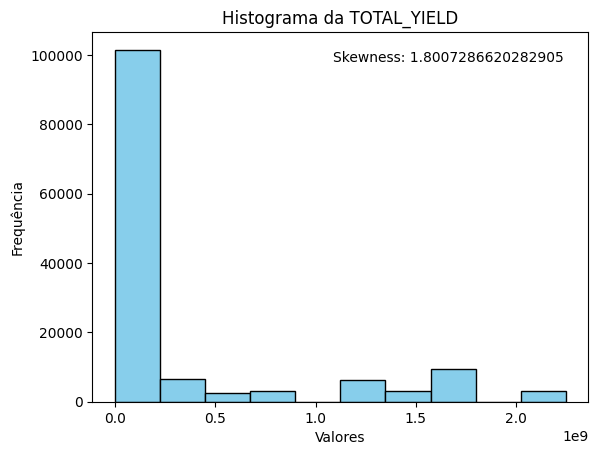

In [24]:
# Filtrando os valores menores que o limite inferior
df_filtered = df[df['TOTAL_YIELD'] != 0.0]

# Calculando o coeficiente de assimetria
skewness = df['TOTAL_YIELD'].skew()

# Plotando o histograma
plt.hist(df_filtered['TOTAL_YIELD'], bins=10, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da TOTAL_YIELD')

# Adicionando texto com o valor do coeficiente de assimetria
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Exibindo o histograma
plt.show()

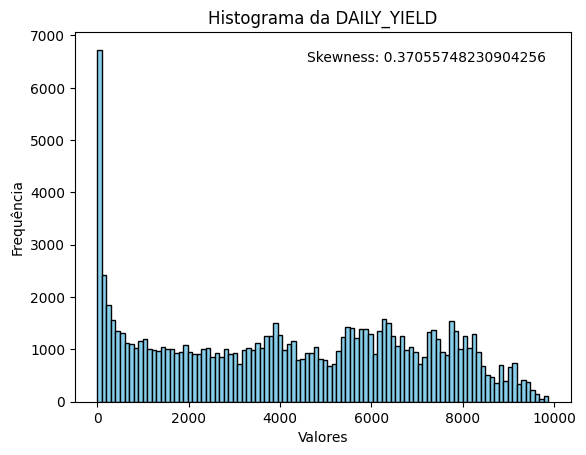

In [25]:
# Filtrando os valores menores que o limite inferior
df_filtered = df[df['DAILY_YIELD'] != 0.0]

# Calculando o coeficiente de assimetria
skewness = df['DAILY_YIELD'].skew()

# Plotando o histograma
plt.hist(df_filtered['DAILY_YIELD'], bins=100, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da DAILY_YIELD')

# Adicionando texto com o valor do coeficiente de assimetria
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Exibindo o histograma
plt.show()

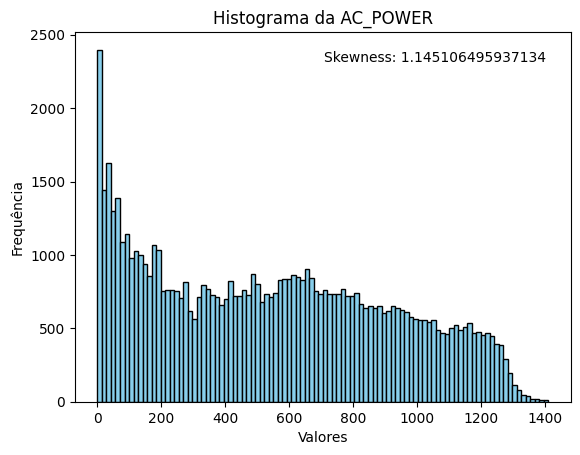

In [26]:
# Filtrando os valores menores que o limite inferior
df_filtered = df[df['AC_POWER'] != 0.0]

# Calculando o coeficiente de assimetria
skewness = df['AC_POWER'].skew()

# Plotando o histograma
plt.hist(df_filtered['AC_POWER'], bins=100, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da AC_POWER')

# Adicionando texto com o valor do coeficiente de assimetria
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Exibindo o histograma
plt.show()

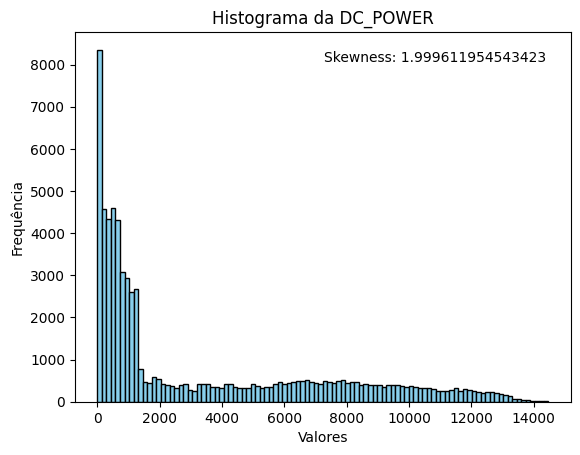

In [27]:
# Filtrando os valores menores que o limite inferior
df_filtered = df[df['DC_POWER'] != 0.0]

# Calculando o coeficiente de assimetria
skewness = df['DC_POWER'].skew()

# Plotando o histograma
plt.hist(df_filtered['DC_POWER'], bins=100, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da DC_POWER')

# Adicionando texto com o valor do coeficiente de assimetria
plt.text(0.95, 0.95, f'Skewness: {skewness}', ha='right', va='top', transform=plt.gca().transAxes)

# Exibindo o histograma
plt.show()

### Grafico de soma de Yeld total por data

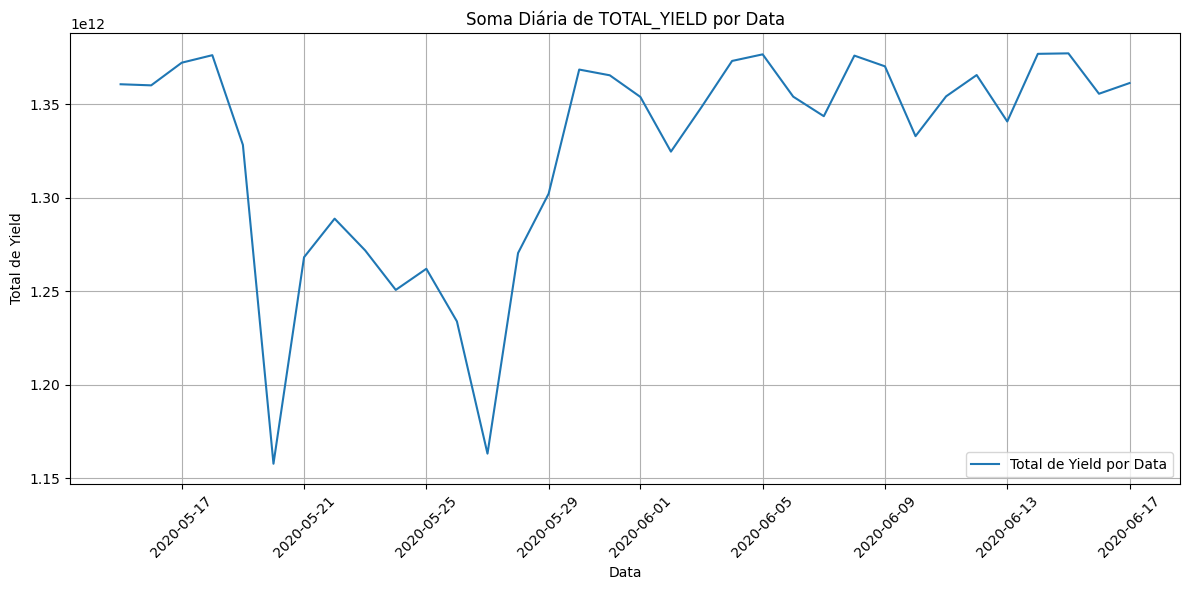

In [103]:
# Agrupando por 'DATE' e somando 'TOTAL_YIELD'
daily_yield = df.groupby('DATE')['TOTAL_YIELD'].sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(daily_yield['DATE'], daily_yield['TOTAL_YIELD'], label='Total de Yield por Data')
plt.xlabel('Data')
plt.ylabel('Total de Yield')
plt.title('Soma Diária de TOTAL_YIELD por Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotação das datas no eixo X para melhor visualização
plt.tight_layout()  # Ajusta layout para evitar sobreposição
plt.show()

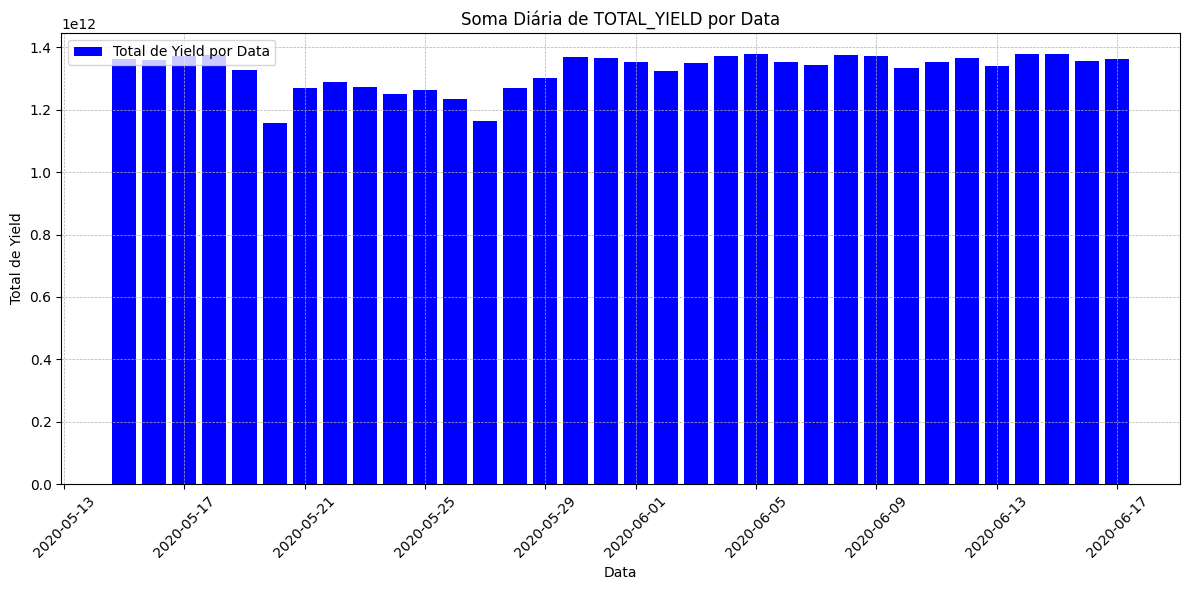

In [104]:
# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(daily_yield['DATE'], daily_yield['TOTAL_YIELD'], color='blue', label='Total de Yield por Data')
plt.xlabel('Data')
plt.ylabel('Total de Yield')
plt.title('Soma Diária de TOTAL_YIELD por Data')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)  # Rotação das datas no eixo X para melhor visualização
plt.tight_layout()  # Ajusta layout para evitar sobreposição
plt.show()d

# Tarefa 2 - Probabilidade (Discreta):
• Qual é a probabilidade de rolar exatamente dois 6s em cinco lançamentos de um dado justo?
• O número de acidentes industriais em média por semana de trabalho em uma fábrica é de 0,75. Supondo que a distribuição de acidentes siga uma distribuição de Poisson, encontre a probabilidade de que em uma semana específica não haja mais do que dois acidentes.
Apenas declarar as respostas aqui não é suficiente - você deve mostrar claramente como encontrou sua resposta, justificar quaisquer decisões tomadas e incluir gráficos, quando apropriado.


In [57]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Parameters of the binomial distribution
n = 5  # total number of trials (dice rolls)
p = 1/6  # probability of a single success (probability of rolling a 6 on a fair die)

# Calculating the probability of X=2
k = 2  # number of successes (number of 6s)
probability = binom.pmf(k, n, p)

print(f"The probability of rolling exactly two 6s in five rolls of a fair die is: {probability:.4f} or {probability*100:.2f}%.")

The probability of rolling exactly two 6s in five rolls of a fair die is: 0.1608 or 16.08%.


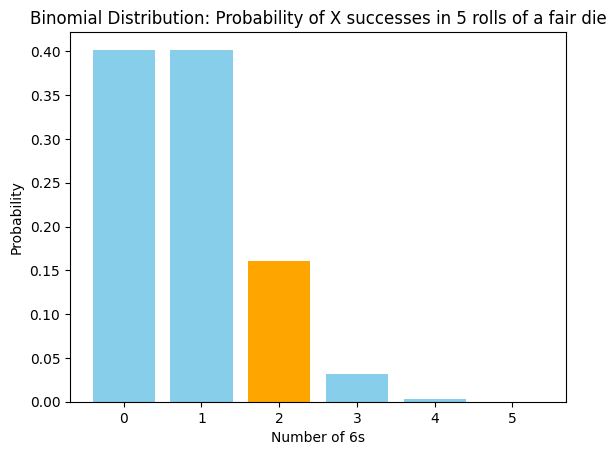

In [60]:
# Creating a graphical representation of the binomial distribution
x = np.arange(0, n+1)
probability = binom.pmf(x, n, p)

# Setting colors for each bar
colors = ['skyblue'] * (n + 1)
colors[k] = 'orange'  # Changing the color of the bar for k=2 to orange

plt.bar(x, probability, color=colors)
plt.xlabel('Number of 6s')
plt.ylabel('Probability')
plt.title('Binomial Distribution: Probability of X successes in 5 rolls of a fair die')
plt.show()

In [54]:
# The number of events
k = 2

# Valor de lambda
v_lambda = 0.75

# Calculando as probabilidades para cada valor de lambda
probability = (np.exp(-v_lambda) * v_lambda**2) / np.math.factorial(2)

print(f"The probability that in a specific week there are no more than two accidents is {probability:.4f} or {probability*100:.2f}%.")

The probability that in a specific week there are no more than two accidents is 0.1329 or 13.29%.


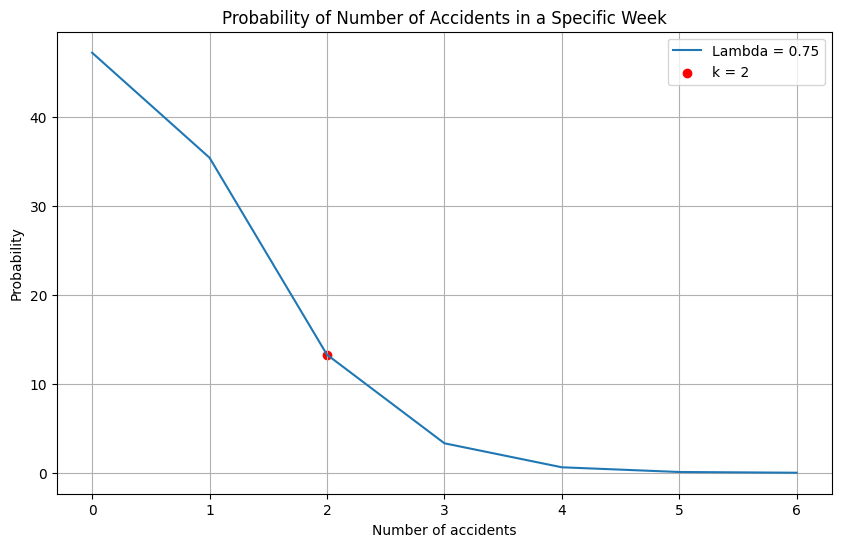

In [86]:
# Valor de lambda desejado
lambda_desired = 0.75

# Números de eventos (número de acidentes)
k_values = np.arange(0, 7)  # Considerando até 6 acidentes para visualização

# Inicializando a matriz de probabilidades
probabilities = np.zeros(len(k_values))

# Calculando as probabilidades para lambda = 0.75 e cada valor de k
for i, k in enumerate(k_values):
    probabilities[i] = 100*(np.exp(-lambda_desired) * lambda_desired**k) / np.math.factorial(k)

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(k_values, probabilities, label=f'Lambda = {lambda_desired}')
plt.scatter(2, probabilities[2], color='red', label='k = 2')
plt.xlabel('Number of accidents')
plt.ylabel('Probability')
plt.title('Probability of Number of Accidents in a Specific Week')
plt.grid(True)
plt.legend()
plt.show()

# Task 3
O tempo que uma pessoa passa no Zoológico de Dublin é distribuído normalmente com uma média de 90 minutos e um desvio padrão de 10 minutos.
Usando esta distribuição, responda o seguinte:

• Se um visitante for selecionado aleatoriamente, encontre a probabilidade de que ele passe no máximo 85 minutos visitando o zoológico.

• Se um visitante for selecionado aleatoriamente, encontre a probabilidade de que ele passe pelo menos 100 minutos visitando o zoológico.

• Dado que você sabe que um visitante específico passou mais tempo do que a média visitando o zoológico, qual é a probabilidade de que ele tenha passado mais de 100 minutos lá?

In [ ]:
from scipy.stats import norm

# Média e desvio padrão
mu = 90
sigma = 10


In [89]:

# Valor para encontrar a probabilidade
x = 85

# Calculando o Z-score
z_score = (x - mu) / sigma

# Usando a função de distribuição acumulada (CDF) para encontrar a probabilidade
probability = norm.cdf(z_score)

print(f'A probabilidade de um visitante passar no máximo 85 minutos no zoológico é de no maximo {probability:.4f} or {probability*100:.2f}%.')

A probabilidade de um visitante passar no máximo 85 minutos no zoológico é de aproximadamente 0.3085 or 30.85%.


In [93]:
# Valor para encontrar a probabilidade (100 minutos)
x = 100

# Calculando o Z-score
z_score = (x - mu) / sigma

# Usando a função de distribuição acumulada (CDF) para encontrar a probabilidade de passar menos de 100 minutos
probability_less_than_100 = norm.cdf(z_score)

# Calculando a probabilidade de passar pelo menos 100 minutos
probability_at_least_100 = 1 - probability_less_than_100

print(f'A probabilidade de que um visitante passe pelo menos 100 minutos no zoológico é de aproximadamente {probability_at_least_100:.4f} or {probability_at_least_100*100:.2f}%.')

A probabilidade de que um visitante passe pelo menos 100 minutos no zoológico é de aproximadamente 0.1587 or 15.87%.


In [94]:
# Valor para encontrar a probabilidade (100.1 minutos)
x = 100.1

# Calculando o Z-score
z_score = (x - mu) / sigma

# Usando a função de distribuição acumulada (CDF) para encontrar a probabilidade de passar menos de 100 minutos
probability_less_than_100 = norm.cdf(z_score)

# Calculando a probabilidade de passar pelo menos 100 minutos
probability_at_least_100 = 1 - probability_less_than_100

print(f'A probabilidade de que um visitante passe pelo menos 100 minutos no zoológico é de aproximadamente {probability_at_least_100:.4f} or {probability_at_least_100*100:.2f}%.')

A probabilidade de que um visitante passe pelo menos 100 minutos no zoológico é de aproximadamente 0.1562 or 15.62%.


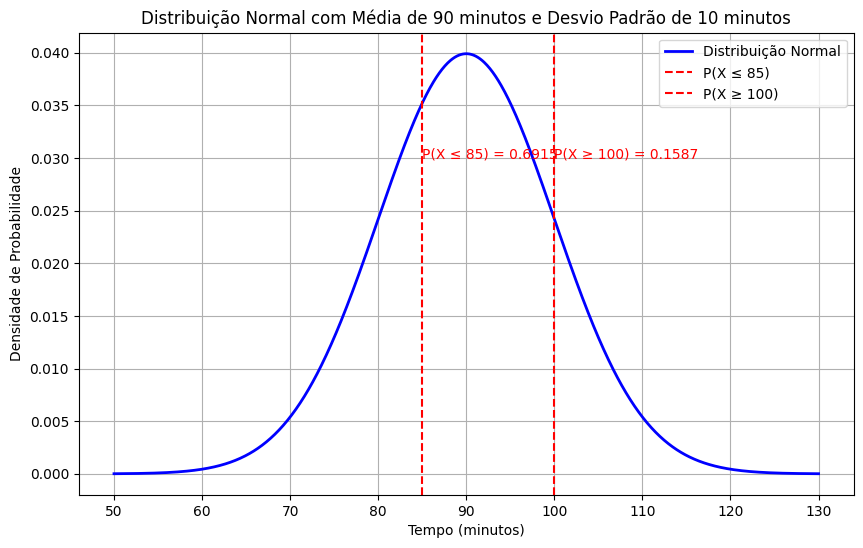

In [96]:
# Valores para o eixo x
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Distribuição normal
pdf = norm.pdf(x, mu, sigma)

# Probabilidades de interesse
x_values = [85, 100]
probabilities = [1 - norm.cdf((x_val - mu) / sigma) for x_val in x_values]
probability_labels = ['P(X ≤ 85)', 'P(X ≥ 100)']

# Plotagem da distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='Distribuição Normal')

# Adicionando linhas verticais para os pontos de interesse
for i, x_val in enumerate(x_values):
    plt.axvline(x_val, color='r', linestyle='--', label=probability_labels[i])

# Adicionando probabilidades acima das linhas verticais
for i, x_val in enumerate(x_values):
    plt.text(x_val, 0.03, f'{probability_labels[i]} = {probabilities[i]:.4f}', color='r', fontsize=10)

# Configurações adicionais do gráfico
plt.xlabel('Tempo (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal com Média de 90 minutos e Desvio Padrão de 10 minutos')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()